# Regression Week 1: Simple Linear Regression

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


### Visualizing the relationship

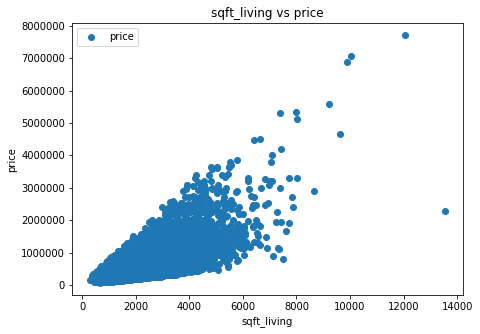

In [5]:
sales.plot(x='sqft_living', y='price', style='o',figsize=(7, 5))  
plt.title('sqft_living vs price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

### Using scikitlearn linear regression package

In [6]:
X_train, X_test = train_data['sqft_living'].values.reshape(-1, 1), test_data['sqft_living'].values.reshape(-1, 1)
y_train, y_test = train_data['price'].values, test_data['price'].values

In [7]:
reg = LinearRegression().fit(X_train, y_train)
reg.intercept_, reg.coef_

(-47116.07907289371, array([281.95883963]))

In [8]:
#Question 6:
reg.coef_ * 2650 + reg.intercept_

array([700074.84594751])

In [9]:
#Question 7:
#800000 = reg.coef_ * x + reg.intercept_
x = (800000 - reg.intercept_) / reg.coef_
print(x)

[3004.39624515]


In [10]:
y_pred = reg.predict(X_test)

compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(10)

,Actual,Predicted
0,310000.0,3.560851e+05
1,650000.0,7.846625e+05
2,233000.0,4.350335e+05
3,580500.0,6.070284e+05
4,535000.0,2.602191e+05
5,605000.0,6.916161e+05
6,775000.0,1.142750e+06
7,292500.0,5.872913e+05
8,289000.0,3.081521e+05
9,571000.0,7.282707e+05


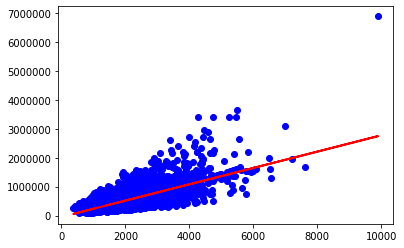

In [11]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean:', np.mean(y_test))
RSS = np.sum(np.power((y_test - y_pred), 2))
print('RSS:', RSS)

Mean Squared Error: 65122471888.81819
Mean: 543054.0430361788
RSS: 275402933617812.12


# Regression Week 2: Multiple Linear Regression

In [13]:
train_data['bedrooms_squared'] = train_data['bedrooms'].apply(lambda x: x**2)
test_data['bedrooms_squared'] = test_data['bedrooms'].apply(lambda x: x**2)

train_data['bed_bath_rooms'] = train_data['bedrooms'] * train_data['bathrooms']
test_data['bed_bath_rooms'] = test_data['bedrooms'] * test_data['bathrooms']

train_data['log_sqft_living'] = train_data['sqft_living'].apply(lambda x: np.log(x))
test_data['log_sqft_living'] = test_data['sqft_living'].apply(lambda x: np.log(x))

train_data['lat_plus_long'] = train_data['lat'] + train_data['long']
test_data['lat_plus_long'] = test_data['lat'] + test_data['long']

In [14]:
# Questão 4:
print(test_data['bedrooms_squared'].mean())
print(test_data['bed_bath_rooms'].mean())
print(test_data['log_sqft_living'].mean())
print(test_data['lat_plus_long'].mean())

12.4466777015843
7.5039016315913925
7.550274679645921
-74.65333355403185


In [15]:
model_1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']
model_3 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 'bedrooms_squared', 'log_sqft_living','lat_plus_long']

In [16]:
#Question 6 and 7:
reg1 = LinearRegression().fit(train_data[model_1], y_train)
print(reg1.coef_)
reg2 = LinearRegression().fit(train_data[model_2], y_train)
print(reg2.coef_)
reg3 = LinearRegression().fit(train_data[model_3], y_train)
print(reg3.coef_)

[ 3.12258646e+02 -5.95865332e+04  1.57067421e+04  6.58619264e+05
 -3.09374351e+05]
[ 3.06610053e+02 -1.13446368e+05 -7.14613083e+04  6.54844630e+05
 -2.94298969e+05  2.55796520e+04]
[ 5.29422820e+02  3.45142296e+04  6.70607813e+04  5.34085611e+05
 -4.06750711e+05 -8.57050439e+03 -6.78858667e+03 -5.61831484e+05
  1.27334900e+05]


In [17]:
#Question 10:
#Using training data
y_pred = reg1.predict(train_data[model_1])
rss_model_1 = np.sum(np.power((y_train - y_pred), 2))
y_pred = reg2.predict(train_data[model_2])
rss_model_2 = np.sum(np.power((y_train - y_pred), 2))
y_pred = reg3.predict(train_data[model_3])
rss_model_3 = np.sum(np.power((y_train - y_pred), 2))
print(rss_model_1, rss_model_2, rss_model_3)

967879963049545.8 958419635074070.6 903436455050477.2


In [18]:
#Question 12:
#Using testing data
y_pred = reg1.predict(test_data[model_1])
rss_model_1 = np.sum(np.power((y_test - y_pred), 2))
y_pred = reg2.predict(test_data[model_2])
rss_model_2 = np.sum(np.power((y_test - y_pred), 2))
y_pred = reg3.predict(test_data[model_3])
rss_model_3 = np.sum(np.power((y_test - y_pred), 2))
print(rss_model_1, rss_model_2, rss_model_3)

225500469795490.12 223377462976467.38 259236319207181.34


# Regression Week 3: Polynomial Regression

In [19]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [20]:
#Using data
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
train_data = train_data.sort_values(['sqft_living','price'])

test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
test_data = test_data.sort_values(['sqft_living','price'])

val_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
val_data = val_data.sort_values(['sqft_living','price'])

In [123]:
def regressao_e_plot(df, grau, x, y, title):
    poly1_data = polynomial_dataframe(df['sqft_living'], grau)

    reg1 = LinearRegression().fit(poly1_data, df['price'])
    print('(' + title + ')')
    print(reg1.intercept_, reg1.coef_)
    print("--")
    
    ax = fig.add_subplot(grid[x, y])
    ax.set_title(title, fontsize=10)
    ax.plot(poly1_data['power_1'],df['price'],'.',
        poly1_data['power_1'], reg1.predict(poly1_data),'-')

(Grau 1)
-43580.743094474194 [280.6235679]
--
(Grau 2)
199222.27930548415 [6.79940947e+01 3.85812609e-02]
--
(Grau 3)
336819.74821982585 [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]
--
(Grau 15)
537116.3296377105 [ 4.56404164e-91 -2.69409384e-50  1.04863434e-55  4.97841222e-60
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]
--


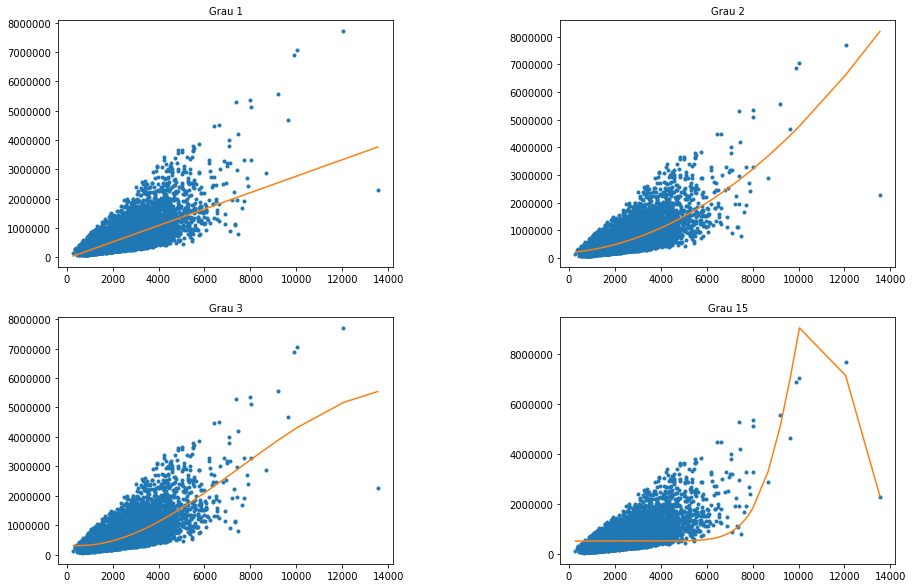

In [124]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)

regressao_e_plot(sales, 1, 0, 0, "Grau 1")
regressao_e_plot(sales, 2, 0, 1, "Grau 2")
regressao_e_plot(sales, 3, 1, 0, "Grau 3")
regressao_e_plot(sales, 15, 1, 1, "Grau 15")

In [84]:
#Separando dataset em 4 subsets
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

(Set 1)
539058.8186636609 [ 3.05794169e-90 -8.00843869e-49 -8.88771771e-55 -4.97841222e-60
  3.23082734e-74  1.10358334e-70  8.37724029e-67  6.23411957e-63
  4.49156443e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641117e-52]
--
(Set 2)
506920.28306726343 [ 2.69062835e-77 -4.25460612e-39  1.28373277e-44  1.73438445e-49
 -2.08809743e-53  1.52836073e-58  3.62461992e-55  1.49667049e-51
  5.73503042e-48  1.95015184e-44  5.37537382e-41  9.37452626e-38
 -3.62324586e-41  4.63847482e-45 -1.96476265e-49]
--
(Set 3)
530874.3166531092 [ 2.83751934e-88 -9.22064791e-49  2.94746134e-55  3.22507887e-85
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]
--
(Set 4)
494822.45540087833 [ 1.37062034e-76 -7.34951798e-40 -1.26019577e-44 -2.06917914e-50
 -4.17619486e-53  5.31613461e-58  1.27051326e-54  4.87799082e-51
  1.73524690e-47  5.

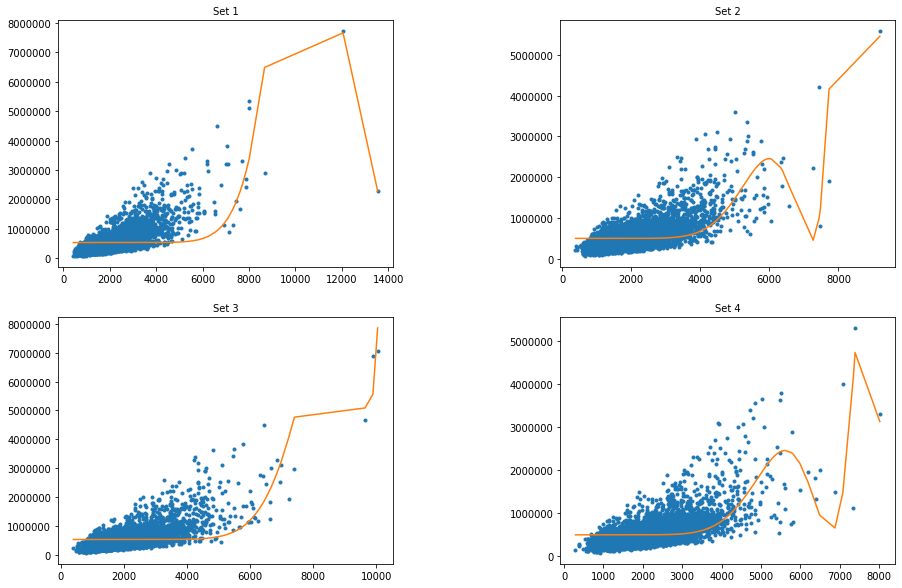

In [126]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)

regressao_e_plot(set1, 15, 0, 0, "Set 1")
regressao_e_plot(set2, 15, 0, 1, "Set 2")
regressao_e_plot(set3, 15, 1, 0, "Set 3")
regressao_e_plot(set4, 15, 1, 1, "Set 4")

- The sign(positive or negative) for power_15 is not the same for all 4 models
- The plotted fitted lines all look different in all four plots

### Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

In [54]:
for degree in range(1, 16):
    poly_data = polynomial_dataframe(train_data['sqft_living'], degree)
    reg = LinearRegression().fit(poly_data, train_data['price'])
    poly_val_data = polynomial_dataframe(val_data['sqft_living'], degree)
    y_pred = reg.predict(poly_val_data)
    rss = np.sum(np.power((val_data['price'] - y_pred), 2))
    print (degree, rss)

1 629097886299585.6
2 623955062706518.0
3 625820280251937.1
4 629987337764795.0
5 628236481177831.2
6 566268410985694.6
7 1073848082439594.9
8 7087776138926927.0
9 4.5300960466578536e+16
10 2.472550229317506e+17
11 1.1752096527676242e+18
12 5.26721619391083e+18
13 7.61623002129836e+17
14 2.2975609251144553e+18
15 6.955038097965418e+18


- Degree 6 has the lowest RSS (566268410985694.6)

### What is the RSS on TEST data for the model with the degree selected from Validation data?

In [55]:
poly_data = polynomial_dataframe(train_data['sqft_living'], 6)
reg = LinearRegression().fit(poly_data, train_data['price'])
poly_test_data = polynomial_dataframe(test_data['sqft_living'], 6)
y_pred = reg.predict(poly_test_data)
rss = np.sum(np.power((test_data['price'] - y_pred), 2))
print(rss)

135225102248049.16


# Regression Week 4:Ridge Regression

In [140]:
#Using datasets
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

220664.37505436165 [ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


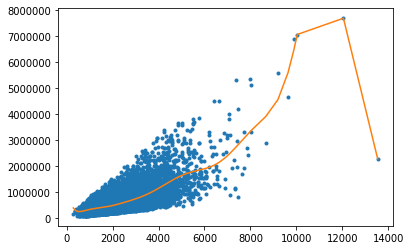

In [127]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

l2_small_penalty = 1.5e-5
modle = Ridge(alpha=l2_small_penalty, normalize=True)
modle.fit(poly15_data, sales['price'])
print(modle.intercept_, modle.coef_)

fig = plt.subplots(figsize=(6, 4))
plt.plot(poly15_data['power_1'],sales['price'],'.',
         poly15_data['power_1'], model.predict(poly15_data),'-')

In [130]:
def ridge_e_plot(df, grau, l2_penalty, x, y, title):
    poly_data = polynomial_dataframe(df['sqft_living'], grau)
    
    ridge = Ridge(alpha=l2_penalty, normalize=True)
    ridge.fit(poly_data, df['price'])
    print('(' + title + ')')
    print(ridge.intercept_, ridge.coef_)
    print("--")
    
    ax = fig.add_subplot(grid[x, y])
    ax.set_title(title, fontsize=10)
    ax.plot(poly_data['power_1'],df['price'],'.',
        poly_data['power_1'], ridge.predict(poly_data),'-')

(Set 1)
23888.825472758617 [ 5.44669398e+02 -3.55447604e-01  1.22446380e-04 -1.17175310e-08
 -3.90512535e-13 -1.39076282e-17  1.47860304e-20  6.87491982e-25
 -7.57204244e-29 -1.04097331e-32 -3.71843691e-37  3.39989326e-41
  5.56591893e-45  2.53761333e-49 -3.35152868e-53]
--
(Set 2)
-55614.628632518696 [ 8.59362594e+02 -8.18118181e-01  4.28879899e-04 -9.12770267e-08
 -2.69605406e-12  3.73980423e-15 -1.42711912e-19 -6.30794758e-23
 -1.44559542e-27  7.44321032e-31  9.25866386e-35  3.27987831e-41
 -1.29543497e-42 -1.38781285e-46  1.66546462e-50]
--
(Set 3)
470987.8477163515 [-7.55395874e+02  9.75579427e-01 -4.58945936e-04  7.77957906e-08
  7.15013598e-12 -2.88601953e-15 -2.13678934e-20  3.38085215e-23
  2.19178382e-27 -1.97067901e-31 -4.15993228e-35 -1.80196142e-39
  3.19071194e-43  5.08456923e-47 -3.93304280e-51]
--
(Set 4)
-145655.62691923347 [ 1.11944575e+03 -9.83760292e-01  3.38770971e-04  3.60376838e-08
 -4.37813919e-11  5.77191573e-15  7.66795253e-19 -9.49297769e-23
 -1.96030781e-26 

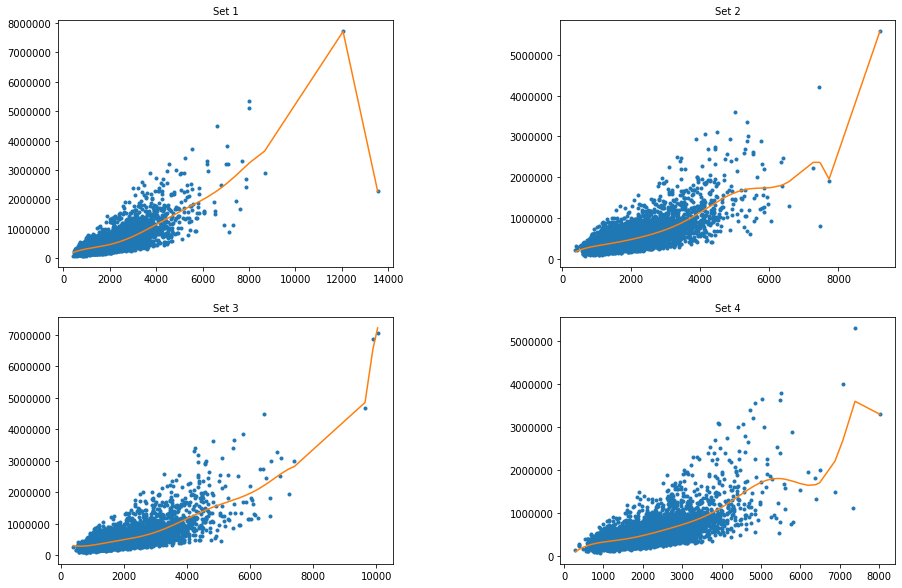

In [131]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)

ridge_e_plot(set_1, 15, 1e-9, 0, 0, "Set 1")
ridge_e_plot(set_2, 15, 1e-9, 0, 1, "Set 2")
ridge_e_plot(set_3, 15, 1e-9, 1, 0, "Set 3")
ridge_e_plot(set_4, 15, 1e-9, 1, 1, "Set 4")

- The fit changed a lot even with a small penalty

(Set 1)
539103.0310577954 [2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]
--
(Set 2)
529853.0253577976 [2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]
--
(Set 3)
533640.1140974432 [2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]
--
(Set 4)
524562.9690466832 [2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-4

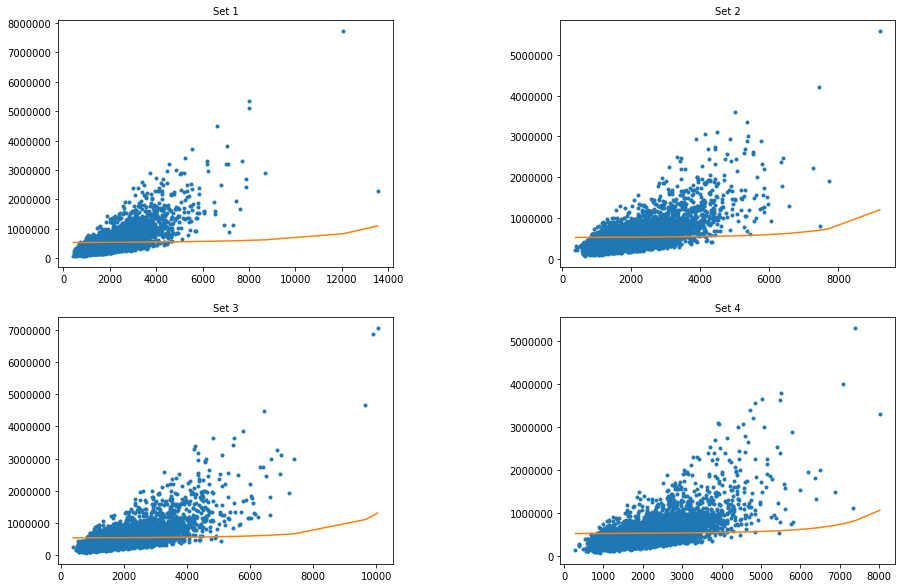

In [132]:
#Now using a large penalty
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)

ridge_e_plot(set_1, 15, 1.23e2, 0, 0, "Set 1")
ridge_e_plot(set_2, 15, 1.23e2, 0, 1, "Set 2")
ridge_e_plot(set_3, 15, 1.23e2, 1, 0, "Set 3")
ridge_e_plot(set_4, 15, 1.23e2, 1, 1, "Set 4")

- Too much penalty

### Using k-fold Cross Validation

In [155]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    
    n = len(data)
    av_rss = []
    
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        
        val = data[start:end+1]
        out_val = output[start:end+1]
        train = data[0:start].append(data[end+1:n])
        out_train = output[0:start].append(output[end+1:n])
        
        ridge = Ridge(alpha=l2_penalty, normalize=True)
        ridge.fit(train, out_train)
        y_pred = ridge.predict(val)
        rss = np.sum(np.power((out_val - y_pred), 2))
        #print(rss)
        av_rss.append(rss)
        
    average = np.mean(av_rss)
        
    return (average)

In [168]:
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

for i in np.logspace(3, 9, num=13):
    print("{:.2e}".format(i) + " : "  + "{:.2e}".format(k_fold_cross_validation(10, i, poly_data, train_valid_shuffled['price'])))

1.00e+03 : 2.65e+14
3.16e+03 : 2.66e+14
1.00e+04 : 2.66e+14
3.16e+04 : 2.66e+14
1.00e+05 : 2.66e+14
3.16e+05 : 2.66e+14
1.00e+06 : 2.66e+14
3.16e+06 : 2.66e+14
1.00e+07 : 2.66e+14
3.16e+07 : 2.66e+14
1.00e+08 : 2.66e+14
3.16e+08 : 2.66e+14
1.00e+09 : 2.66e+14


- 10^3 is the best l2 penalty value found 